# Załadowanie potrzebnych bibliotek

### Wyjaśnienie kodu

Ten kod importuje kilka bibliotek i modułów niezbędnych do budowania i trenowania sieci neuronowej za pomocą TensorFlow i Keras, a także do obsługi i wizualizacji danych.

1. **Importy TensorFlow i Keras:**
   - `import tensorflow as tf`: Importuje bibliotekę TensorFlow, która jest otwartą platformą do uczenia maszynowego.
   - `from tensorflow.keras.datasets import cifar10`: Importuje zbiór danych CIFAR-10 z Keras, który jest wysokopoziomowym API do budowania i trenowania modeli głębokiego uczenia. CIFAR-10 to zbiór danych zawierający 60,000 kolorowych obrazów w 10 klasach, z 6,000 obrazami na klasę.
   - `from tensorflow.keras.models import Sequential`: Importuje model Sequential, który jest liniowym stosikiem warstw.
   - `from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D`: Importuje warstwy Dense, Flatten, Conv2D i MaxPooling2D. Dense to w pełni połączona warstwa, Flatten służy do spłaszczania wejścia, Conv2D to warstwa konwolucyjna, a MaxPooling2D to warstwa maksymalnego próbkowania.
   - `from tensorflow.keras.optimizers import Adam`: Importuje optymalizator Adam, który jest algorytmem do optymalizacji gradientowej pierwszego rzędu.
   - `from tensorflow.keras.losses import sparse_categorical_crossentropy`: Importuje funkcję straty sparse categorical cross-entropy, która jest używana do problemów klasyfikacji wieloklasowej.

2. **Importy Matplotlib i NumPy:**
   - `import matplotlib.pyplot as plt`: Importuje bibliotekę Matplotlib do tworzenia wykresów i wizualizacji danych.
   - `import numpy as np`: Importuje bibliotekę NumPy, która jest używana do operacji numerycznych na tablicach.

3. **Import PIL:**
   - `from PIL import Image`: Importuje moduł Image z biblioteki Python Imaging Library (PIL), który jest używany do otwierania, manipulowania i zapisywania plików obrazów.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Załadowanie i normalizacja danych

### Wyjaśnienie kodu

Ten fragment kodu ładuje zbiór danych CIFAR-10 i normalizuje dane, przeskalowując wartości pikseli do zakresu [0, 1]. Dodatkowo wyświetla kształty załadowanych danych oraz przykładowy obraz z etykietą.

1. **Ładowanie zbioru danych CIFAR-10:**
   - `cifar10.load_data()`: Funkcja ta ładuje zbiór danych CIFAR-10, który zawiera kolorowe obrazy w 10 klasach (np. samoloty, samochody, ptaki, koty, jelenie, psy, żaby, konie, statki, ciężarówki).
   - `x_train` i `y_train`: `x_train` to zestaw treningowy obrazów, a `y_train` to odpowiadające im etykiety.
   - `x_test` i `y_test`: `x_test` to zestaw testowy obrazów, a `y_test` to odpowiadające im etykiety.

2. **Normalizacja danych:**
   - Normalizacja polega na przeskalowaniu wartości pikseli z zakresu [0, 255] do zakresu [0, 1].
   - `x_train / 255.0`: Każdy piksel w zestawie treningowym jest dzielony przez 255.0, aby przeskalować wartości do zakresu [0, 1].
   - `x_test / 255.0`: Każdy piksel w zestawie testowym jest dzielony przez 255.0, aby przeskalować wartości do zakresu [0, 1].

3. **Wyświetlenie kształtów danych:**
   - `x_train.shape`: Wyświetla kształt tablicy `x_train`, który powinien być `(50000, 32, 32, 3)` - 50,000 obrazów o wymiarach 32x32 piksele z 3 kanałami kolorów (RGB).
   - `y_train.shape`: Wyświetla kształt tablicy `y_train`, który powinien być `(50000, 1)` - 50,000 etykiet.
   - `x_test.shape`: Wyświetla kształt tablicy `x_test`, który powinien być `(10000, 32, 32, 3)` - 10,000 obrazów testowych.
   - `y_test.shape`: Wyświetla kształt tablicy `y_test`, który powinien być `(10000, 1)` - 10,000 etykiet testowych.

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


# Wizualizacja danych

### Wyjaśnienie kodu

Ten fragment kodu definiuje listę nazw klas dla zbioru danych CIFAR-10 oraz funkcję do wyświetlania obrazów z tego zbioru wraz z ich etykietami. Następnie wywołuje tę funkcję, aby wyświetlić przykładowe obrazy.

1. **Definicja nazw klas:**
   - `class_names`: Lista zawierająca nazwy klas dla zbioru danych CIFAR-10. Każda nazwa odpowiada jednej z 10 klas (np. 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck').

2. **Definicja funkcji `plot_cifar10_images`:**
   - `plot_cifar10_images(images, labels, class_names, num_images=10)`: Funkcja ta wyświetla obrazy z etykietami.
   - `plt.figure(figsize=(10, 10))`: Tworzy nową figurę o rozmiarze 10x10 cali.
   - `for i in range(num_images)`: Pętla iterująca przez `num_images` (domyślnie 10) obrazów.
     - `plt.subplot(5, 5, i + 1)`: Tworzy podwykres w układzie 5x5.
     - `plt.xticks([])`, `plt.yticks([])`: Usuwa znaczniki osi x i y.
     - `plt.grid(False)`: Wyłącza siatkę.
     - `plt.imshow(images[i])`: Wyświetla obraz `images[i]`.
     - `plt.xlabel(class_names[labels[i][0]])`: Ustawia etykietę osi x na nazwę klasy odpowiadającą etykiecie `labels[i][0]`.
   - `plt.show()`: Wyświetla figurę z obrazami.

3. **Wywołanie funkcji `plot_cifar10_images`:**
   - `plot_cifar10_images(x_train, y_train, class_names, num_images=25)`: Wywołuje funkcję `plot_cifar10_images`, aby wyświetlić 25 obrazów z zestawu treningowego `x_train` wraz z ich etykietami `y_train`.

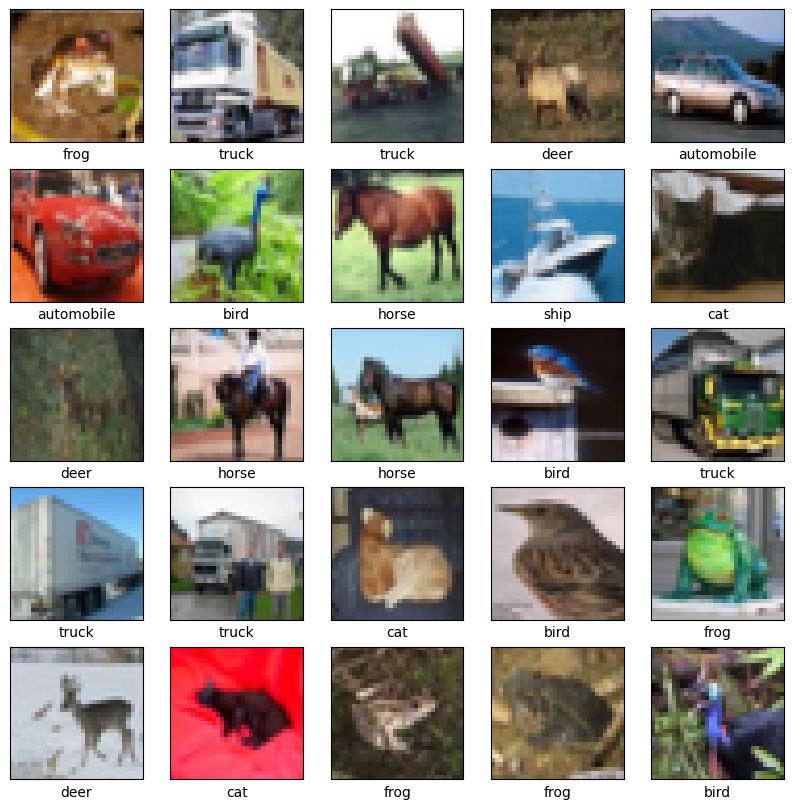

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_cifar10_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i][0]])    
    plt.show()

plot_cifar10_images(x_train, y_train, class_names, num_images=25)

# Tworzenie modelu

### Wyjaśnienie kodu

Ten fragment kodu definiuje model sieci neuronowej typu CNN (Convolutional Neural Network) przy użyciu biblioteki Keras. Model ten jest przeznaczony do klasyfikacji obrazów z zestawu danych CIFAR-10.

1. **Tworzenie modelu sekwencyjnego:**
   - `Sequential()`: Inicjalizuje model sekwencyjny, który jest liniowym stosowaniem warstw.

2. **Dodawanie warstw do modelu:**
   - `Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))`: Dodaje warstwę konwolucyjną z 32 filtrami o rozmiarze 3x3, funkcją aktywacji ReLU i kształtem wejściowym (32, 32, 3) (32x32 piksele, 3 kanały kolorów).
   - `MaxPooling2D((2, 2))`: Dodaje warstwę maksymalnego spoolingowania z oknem 2x2, która zmniejsza wymiary danych wejściowych.
   - `Conv2D(64, (3, 3), activation='relu')`: Dodaje kolejną warstwę konwolucyjną z 64 filtrami o rozmiarze 3x3 i funkcją aktywacji ReLU.
   - `MaxPooling2D((2, 2))`: Dodaje kolejną warstwę maksymalnego spoolingowania z oknem 2x2.
   - `Conv2D(64, (3, 3), activation='relu')`: Dodaje trzecią warstwę konwolucyjną z 64 filtrami o rozmiarze 3x3 i funkcją aktywacji ReLU.
   - `Flatten()`: Spłaszcza dane wejściowe do jednowymiarowego wektora.
   - `Dense(64, activation='relu')`: Dodaje w pełni połączoną (gęstą) warstwę z 64 jednostkami i funkcją aktywacji ReLU.
   - `Dense(10, activation='softmax')`: Dodaje w pełni połączoną (gęstą) warstwę z 10 jednostkami i funkcją aktywacji softmax, która zwraca prawdopodobieństwa dla każdej z 10 klas.

3. **Podsumowanie modelu:**
   - `model.summary()`: Wyświetla podsumowanie modelu, w tym informacje o każdej warstwie, kształty wyjściowe i liczbę parametrów.

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

d:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Kompilacja i trenowanie modelu

### Wyjaśnienie kodu

Ten fragment kodu kompiluje model, określając optymalizator, funkcję straty i metryki, a następnie trenuje model na danych treningowych.

1. **Kompilacja modelu:**
   - `model.compile(optimizer=Adam(), loss=sparse_categorical_crossentropy, metrics=['accuracy'])`: Kompiluje model, określając:
     - `optimizer=Adam()`: Używa optymalizatora Adam do aktualizacji wag modelu.
     - `loss=sparse_categorical_crossentropy`: Używa funkcji straty sparse categorical crossentropy, która jest odpowiednia dla problemów klasyfikacji wieloklasowej z etykietami w postaci całkowitoliczbowej.
     - `metrics=['accuracy']`: Monitoruje dokładność modelu podczas treningu.

2. **Trenowanie modelu:**
   - `history = model.fit(x_train, y_train, validation_split=0.2, epochs=10)`: Trenuje model na danych treningowych `x_train` i odpowiadających im etykietach `y_train`, określając:
     - `validation_split=0.2`: Używa 20% danych treningowych jako dane walidacyjne.
     - `epochs=10`: Trenuje model przez 10 epok.
   - `history`: Zmienna `history` przechowuje informacje o treningu, takie jak wartości straty i dokładności dla danych treningowych i walidacyjnych w każdej epoce.

In [6]:
model.compile(optimizer=Adam(),
            loss = sparse_categorical_crossentropy,
            metrics=['accuracy'])   

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3281 - loss: 1.8034 - val_accuracy: 0.4834 - val_loss: 1.4374
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5399 - loss: 1.2792 - val_accuracy: 0.5876 - val_loss: 1.1598
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6198 - loss: 1.0868 - val_accuracy: 0.6037 - val_loss: 1.1178
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6516 - loss: 0.9842 - val_accuracy: 0.6303 - val_loss: 1.0522
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6843 - loss: 0.9024 - val_accuracy: 0.6709 - val_loss: 0.9270
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7042 - loss: 0.8334 - val_accuracy: 0.6844 - val_loss: 0.8961
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7275 - loss: 0.7750 - val_accuracy: 0.6825 - val_loss: 0.9207
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7415 - loss: 0.7396 -

# Wizualizacja krzywych uczenia

### Wyjaśnienie kodu

Ten fragment kodu definiuje funkcję do wizualizacji krzywych uczenia modelu, pokazując zmiany dokładności i straty w trakcie treningu i walidacji.

1. **Definicja funkcji `plot_learning_curves`:**
   - `plot_learning_curves(history)`: Funkcja ta tworzy wykresy strat i dokładności dla danych treningowych i walidacyjnych.

2. **Pobieranie danych z historii treningu:**
   - `acc = history.history['accuracy']`: Pobiera dokładność treningową z historii treningu.
   - `val_acc = history.history['val_accuracy']`: Pobiera dokładność walidacyjną z historii treningu.
   - `loss = history.history['loss']`: Pobiera stratę treningową z historii treningu.
   - `val_loss = history.history['val_loss']`: Pobiera stratę walidacyjną z historii treningu.
   - `epochs = range(1, len(acc) + 1)`: Tworzy zakres epok od 1 do liczby epok.

3. **Tworzenie wykresów:**
   - `plt.figure(figsize=(14, 5))`: Tworzy nową figurę o rozmiarze 14x5 cali.

4. **Wykres dokładności:**
   - `plt.subplot(1, 2, 1)`: Tworzy pierwszy podwykres dla dokładności.
   - `plt.plot(epochs, acc, 'bo-', label='Dokładność treningowa')`: Rysuje wykres dokładności treningowej jako niebieskie kropki połączone linią.
   - `plt.plot(epochs, val_acc, 'ro-', label='Dokładność walidacyjna')`: Rysuje wykres dokładności walidacyjnej jako czerwone kropki połączone linią.
   - `plt.title('Dokładność treningu i walidacji')`: Ustawia tytuł wykresu dokładności.
   - `plt.xlabel('Epoki')`: Ustawia etykietę osi x na "Epoki".
   - `plt.ylabel('Dokładność')`: Ustawia etykietę osi y na "Dokładność".
   - `plt.legend()`: Dodaje legendę do wykresu, aby odróżnić dokładność treningową od walidacyjnej.

5. **Wykres straty:**
   - `plt.subplot(1, 2, 2)`: Tworzy drugi podwykres dla straty.
   - `plt.plot(epochs, loss, 'bo-', label='Strata treningowa')`: Rysuje wykres straty treningowej jako niebieskie kropki połączone linią.
   - `plt.plot(epochs, val_loss, 'ro-', label='Strata walidacyjna')`: Rysuje wykres straty walidacyjnej jako czerwone kropki połączone linią.
   - `plt.title('Strata treningu i walidacji')`: Ustawia tytuł wykresu straty.
   - `plt.xlabel('Epoki')`: Ustawia etykietę osi x na "Epoki".
   - `plt.ylabel('Strata')`: Ustawia etykietę osi y na "Strata".
   - `plt.legend()`: Dodaje legendę do wykresu, aby odróżnić stratę treningową od walidacyjnej.

6. **Wyświetlenie wykresów:**
   - `plt.show()`: Wyświetla figurę z wykresami.

7. **Wywołanie funkcji `plot_learning_curves`:**
   - `plot_learning_curves(history)`: Wywołuje funkcję `plot_learning_curves`, aby wyświetlić krzywe uczenia modelu.

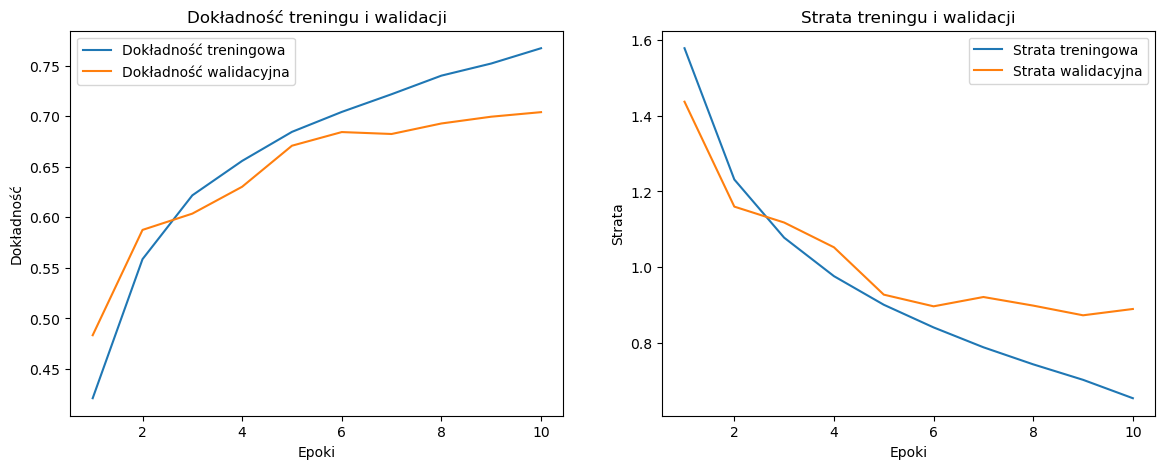

In [7]:
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, '-', label='Dokładność treningowa')
    plt.plot(epochs, val_acc, '-', label='Dokładność walidacyjna')
    plt.title('Dokładność treningu i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, '-', label='Strata treningowa')
    plt.plot(epochs, val_loss, '-', label='Strata walidacyjna')
    plt.title('Strata treningu i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.legend()

    plt.show()

plot_learning_curves(history)

# Ewaluacja modelu

### Wyjaśnienie kodu

Ten fragment kodu ocenia wytrenowany model na zestawie testowym, obliczając stratę i dokładność, a następnie wyświetla te wyniki.

1. **Ewaluacja modelu na zestawie testowym:**
   - `test_loss, test_acc = model.evaluate(x_test, y_test)`: Funkcja `evaluate` ocenia model na danych testowych `x_test` i odpowiadających im etykietach `y_test`. Zwraca stratę (`test_loss`) i dokładność (`test_acc`).

2. **Wyświetlenie wyników:**
   - `print(f"Test accuracy: {test_acc * 100:.2f}%")`: Wyświetla dokładność modelu na zestawie testowym jako procent z dokładnością do dwóch miejsc po przecinku.
   - `print(f"Test loss: {test_loss:.4f}")`: Wyświetla stratę modelu na zestawie testowym z dokładnością do czterech miejsc po przecinku.

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc * 100:.2f}%")
print(f"Test loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6960 - loss: 0.8907
Test accuracy: 69.84%
Test loss: 0.8985


# Wizualizacja predykcji

### Wyjaśnienie kodu

Ten fragment kodu wykonuje predykcje na zestawie testowym przy użyciu wytrenowanego modelu CNN, a następnie wyświetla obrazy wraz z przewidywanymi i rzeczywistymi etykietami.

1. **Predykcje na zestawie testowym:**
   - `predictions = model.predict(x_test)`: Używa wytrenowanego modelu do przewidywania etykiet dla obrazów w zestawie testowym `x_test`.

2. **Definicja funkcji `plot_predictions`:**
   - `plot_predictions(images, predictions, true_labels, class_names, num_images=10)`: Funkcja ta wyświetla obrazy z przewidywanymi i rzeczywistymi etykietami.
   - `plt.figure(figsize=(10, 10))`: Tworzy nową figurę o rozmiarze 10x10 cali.
   - `for i in range(num_images)`: Pętla iterująca przez `num_images` (domyślnie 10) obrazów.
     - `plt.subplot(5, 5, i + 1)`: Tworzy podwykres w układzie 5x5.
     - `plt.xticks([])`, `plt.yticks([])`: Usuwa znaczniki osi x i y.
     - `plt.grid(False)`: Wyłącza siatkę.
     - `plt.imshow(images[i])`: Wyświetla obraz `images[i]`.
     - `predicted_label = np.argmax(predictions[i])`: Określa przewidywaną etykietę jako indeks z najwyższym prawdopodobieństwem.
     - `true_label = true_labels[i][0]`: Pobiera rzeczywistą etykietę.
     - `color = 'blue' if predicted_label == true_label else 'red'`: Ustawia kolor etykiety na niebieski, jeśli przewidywana etykieta jest poprawna, w przeciwnym razie na czerwony.
     - `plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)`: Ustawia etykietę osi x na przewidywaną i rzeczywistą nazwę klasy, kolorując ją odpowiednio.
   - `plt.show()`: Wyświetla figurę z obrazami.

3. **Wywołanie funkcji `plot_predictions`:**
   - `plot_predictions(x_test, predictions, y_test, class_names, num_images=25)`: Wywołuje funkcję `plot_predictions`, aby wyświetlić 25 obrazów z zestawu testowego `x_test` wraz z przewidywanymi i rzeczywistymi etykietami `y_test`.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


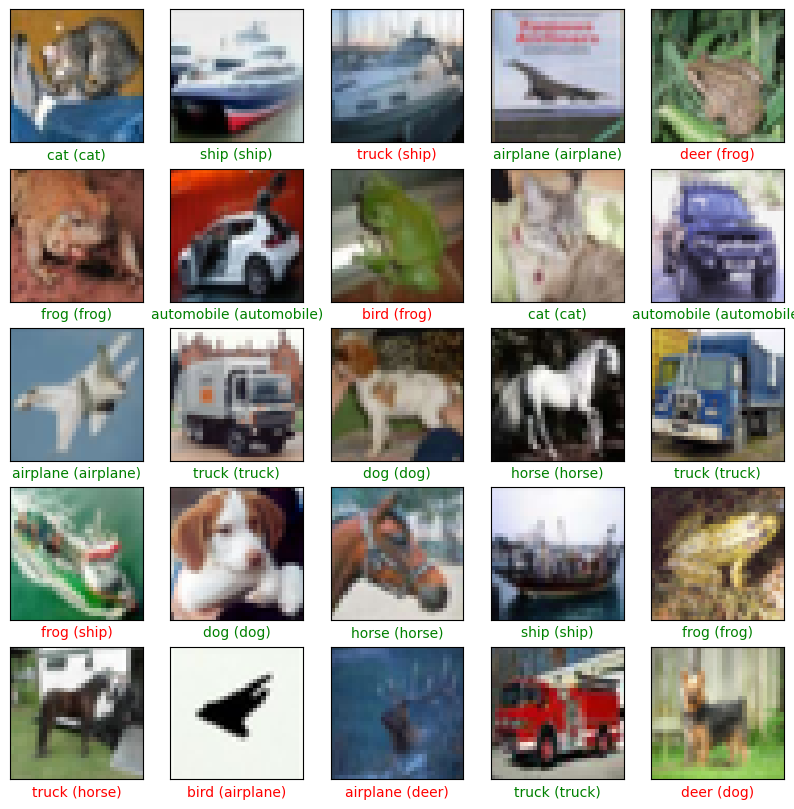

In [ ]:
predictions = model.predict(x_test)

def plot_predictions(images, predictions, true_labels, class_names, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        predicted_label = np.argmax(predictions[i])
        true_label = true_labels[i][0]
        color = 'blue' if predicted_label == true_label else 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
    plt.show()

plot_predictions(x_test, predictions, y_test, class_names, num_images=25)

# Przetwarzanie i przewidywanie obrazu

### Wyjaśnienie kodu

Ten fragment kodu definiuje funkcję `predict_and_display`, która przetwarza obraz, przewiduje jego etykietę za pomocą wytrenowanego modelu, a następnie wyświetla obraz wraz z przewidywaną etykietą. Funkcja jest wywoływana dla dwóch różnych obrazów.

1. **Ładowanie i konwersja obrazu:**
   - `image = Image.open(image_path).convert('RGB')`: Ładuje obraz z podanej ścieżki `image_path` i konwertuje go do formatu RGB (Red, Green, Blue). Konwersja do RGB jest konieczna, aby zapewnić, że obraz ma trzy kanały kolorów, co jest wymagane przez model.

2. **Zmiana rozmiaru obrazu:**
   - `image = image.resize((32, 32))`: Zmienia rozmiar obrazu do wymiarów 32x32 piksele. Model wymaga, aby obrazy wejściowe miały stały rozmiar, więc wszystkie obrazy muszą być przeskalowane do tych wymiarów.

3. **Normalizacja obrazu:**
   - `image_array = np.array(image) / 255.0`: Konwertuje obraz do tablicy NumPy i normalizuje wartości pikseli do zakresu [0, 1] przez podzielenie przez 255.0. Normalizacja jest ważna, aby zapewnić, że wartości pikseli są w odpowiednim zakresie dla modelu.

4. **Wyświetlenie obrazu:**
   - `plt.imshow(image_array)`: Wyświetla przetworzony obraz.
   - `plt.axis('off')`: Usuwa osie z wykresu, aby wyświetlić obraz bez dodatkowych informacji.
   - `plt.show()`: Wyświetla figurę z obrazem.

5. **Przygotowanie obrazu do predykcji:**
   - `image_array = image_array.reshape(1, 32, 32, 3)`: Zmienia kształt tablicy obrazu do formatu (1, 32, 32, 3). Model oczekuje, że dane wejściowe będą miały kształt (liczba_obrazów, wysokość, szerokość, liczba_kanałów), więc dodajemy wymiar dla liczby obrazów (1).

6. **Predykcja etykiety:**
   - `prediction = model.predict(image_array)`: Używa wytrenowanego modelu do przewidywania etykiety dla obrazu. Wynik `prediction` to tablica z prawdopodobieństwami dla każdej klasy.
   - `predicted_label = np.argmax(prediction)`: Określa przewidywaną etykietę jako indeks z najwyższym prawdopodobieństwem.

7. **Wyświetlenie przewidywanej etykiety:**
   - `print(f'Przewidywana etykieta: {class_names[predicted_label]}')`: Wyświetla przewidywaną etykietę, używając listy `class_names` do zamiany indeksu na nazwę klasy.

#### Wywołanie funkcji dla dwóch obrazów

1. **Ścieżki do obrazów:**
   - `image_path = 'auto.jpg'`: Ścieżka do pierwszego obrazu.
   - `image_path_error = 'banan.jpg'`: Ścieżka do drugiego obrazu.

2. **Wywołanie funkcji `predict_and_display`:**
   - `predict_and_display(image_path, model, class_names)`: Wywołuje funkcję `predict_and_display` dla pierwszego obrazu (`auto.jpg`).
   - `predict_and_display(image_path_error, model, class_names)`: Wywołuje funkcję `predict_and_display` dla drugiego obrazu (`banan.jpg`).

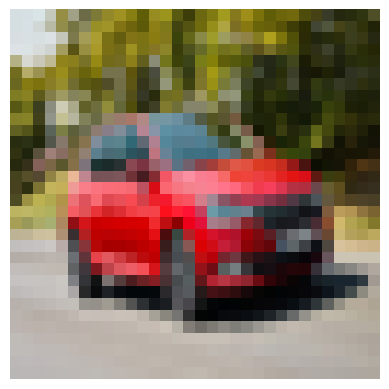

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Przewidywana etykieta: automobile


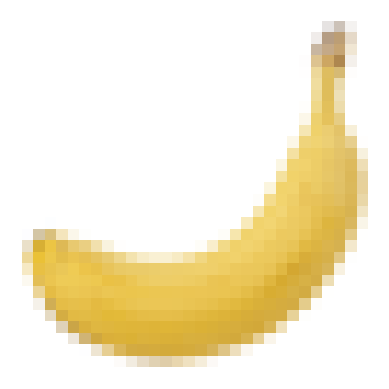

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Przewidywana etykieta: ship


In [15]:
def predict_and_display(image_path, model, class_names):
    image = Image.open(image_path).convert('RGB')

    image = image.resize((32, 32))

    image_array = np.array(image) / 255.0

    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

    image_array = image_array.reshape(1, 32, 32, 3)

    prediction = model.predict(image_array)

    predicted_label = np.argmax(prediction)

    print(f'Przewidywana etykieta: {class_names[predicted_label]}')

image_path = 'auto.jpg'
image_path_error = 'banan.jpg'

predict_and_display(image_path, model, class_names)
predict_and_display(image_path_error, model, class_names)